In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train,y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
X_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [5]:
X_train[0].shape

(32, 32, 3)

In [6]:
X_train[0][4:10].shape

(6, 32, 3)

In [7]:
X_train[0][0].shape

(32, 3)

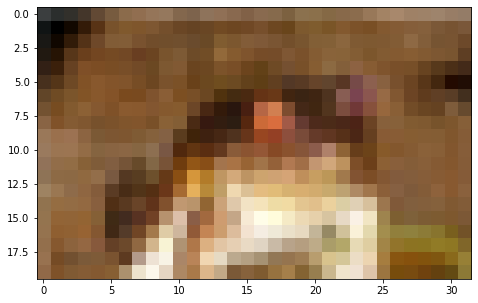

In [8]:
# Oyna bakalım biraz !!!

plt.figure(figsize = (14,5))
plt.imshow(X_train[0][:20])
#plt.axis("off")
plt.show()

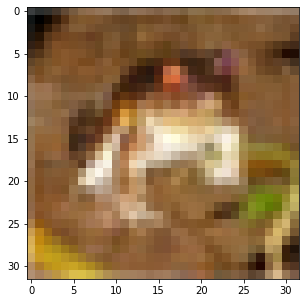

In [9]:
plt.figure(figsize = (14,5))
plt.imshow(X_train[0])
#plt.axis("off")
plt.show()

In [10]:
y_test = y_test.reshape(-1,)
y_train = y_train.reshape(-1,)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
def plot_sample(X,y, index):

    plt.figure(figsize = (15,4))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]],fontsize = 14)
    #plt.axis("off")
    plt.show()

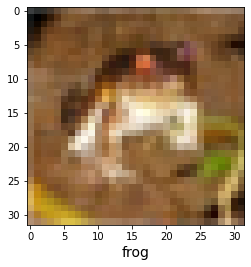

In [13]:
plot_sample(X_train, y_train, index = 0)

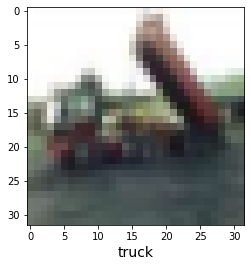

In [14]:
plot_sample(X_train, y_train, index = 2)

# Normalizing The Training Data

In [15]:
# 0 ile 1 arasında değerlere çeviriyoruz...

X_train = X_train / 255
X_test = X_test / 255

In [16]:
X_train.max(),X_train.min(),X_test.max(),X_test.min()

(1.0, 0.0, 1.0, 0.0)

# Model 

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,MaxPooling2D

In [18]:
# Output İçin
pd.Series(y_train).nunique()

10

In [19]:
# Input İçin
X_train.shape

(50000, 32, 32, 3)

In [20]:
# Normal Ann Yapısı

ann = Sequential()

ann.add(Flatten(input_shape = (32,32,3)))
ann.add(Dense(3000, activation = "relu"))
ann.add(Dense(1000, activation = "relu"))
ann.add(Dense(10, activation="softmax"))

ann.compile(optimizer = "SGD", loss = "sparse_categorical_crossentropy", metrics=["accuracy"])

ann_history = ann.fit(X_train, y_train, epochs = 5,  validation_data = (X_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 115s 73ms/step - loss: 1.8126 - accuracy: 0.3528 - val_loss: 1.6910 - val_accuracy: 0.4119
Epoch 2/5
1563/1563 [==============================] - 112s 72ms/step - loss: 1.6238 - accuracy: 0.4263 - val_loss: 1.5668 - val_accuracy: 0.4461
Epoch 3/5
1563/1563 [==============================] - 112s 72ms/step - loss: 1.5406 - accuracy: 0.4573 - val_loss: 1.5206 - val_accuracy: 0.4639
Epoch 4/5
1563/1563 [==============================] - 113s 72ms/step - loss: 1.4795 - accuracy: 0.4798 - val_loss: 1.5616 - val_accuracy: 0.4510
Epoch 5/5
1563/1563 [==============================] - 112s 72ms/step - loss: 1.4339 - accuracy: 0.4952 - val_loss: 1.5648 - val_accuracy: 0.4346


In [21]:
i = 32*32*3 
i*3000

9216000

In [22]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 3000)              9219000   
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              3001000   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10010     
Total params: 12,230,010
Trainable params: 12,230,010
Non-trainable params: 0
_________________________________________________________________


In [23]:
# Oran çok düşük
ann.evaluate(X_test,y_test)

313/313 [==============================] - 8s 25ms/step - loss: 1.5648 - accuracy: 0.4346


[1.5647872686386108, 0.43459999561309814]

In [24]:
y_pred_ann = ann.predict(X_test)
y_pred_ann[:4]

array([[1.09362379e-02, 1.50354728e-01, 9.35445502e-02, 4.37334478e-01,
        1.80145260e-02, 1.73410773e-01, 4.38259989e-02, 2.33307108e-03,
        6.53657392e-02, 4.87983041e-03],
       [1.24550015e-02, 4.78997022e-01, 2.57718400e-03, 2.28399364e-03,
        5.12449711e-04, 8.01131886e-04, 1.15091403e-04, 5.98816201e-04,
        2.12115183e-01, 2.89544046e-01],
       [7.09222108e-02, 5.08289039e-01, 3.43165128e-03, 1.80927082e-03,
        8.70149059e-04, 1.28992868e-03, 3.95877760e-05, 1.38111482e-03,
        3.14742327e-01, 9.72247124e-02],
       [1.20825455e-01, 2.67905056e-01, 1.04566574e-01, 4.61374447e-02,
        2.49736235e-02, 3.25530656e-02, 1.06864958e-03, 3.96686234e-02,
        3.14674497e-01, 4.76269387e-02]], dtype=float32)

In [25]:
y_pred_ann_classes = [np.argmax(i) for i in y_pred_ann]
y_pred_ann_classes[:15]

[3, 1, 1, 8, 4, 6, 1, 6, 5, 1, 8, 1, 1, 7, 1]

In [26]:
y_test[:15]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9], dtype=uint8)

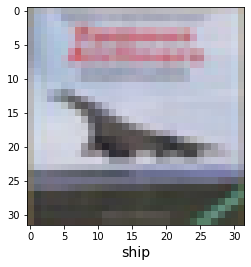

In [27]:
# Yanlış
plot_sample(X_test,y_pred_ann_classes, index = 3)

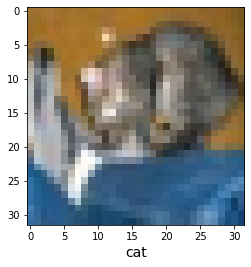

In [28]:
# Doğru
plot_sample(X_test,y_pred_ann_classes, index = 0)

In [29]:
def history_graph(history):

 
    plt.figure(figsize = (15,6))
    
    plt.subplot(1,2,1)
    plt.plot(history.history["accuracy"], label = "Train")
    plt.plot(history.history["val_accuracy"], label = "Test")
    plt.legend(loc = "best")
    size = 15
    plt.xlabel("Epochs ", fontsize = size)
    plt.ylabel("Accuracy", fontsize = size)
    plt.title("Accuracy Graphs", fontsize = size)
    

    plt.subplot(1,2,2)
    plt.plot(history.history["loss"], label = "Train")
    plt.plot(history.history["val_loss"], label = "Test")
    plt.legend(loc = "best")
    size = 15
    plt.xlabel("Epochs ", fontsize = size)
    plt.ylabel("Loss", fontsize = size)
    plt.title("Loss Graphs", fontsize = size)

In [30]:
def confusion_graph(y_true,y_pred,classes = "auto"):

    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    cm = confusion_matrix(y_true,y_pred)

    plt.figure(figsize = (15,6))
    sns.heatmap(cm, annot = True, fmt = "d", cbar = False, annot_kws = {"size": 15}, xticklabels = classes, yticklabels = classes, cmap = "viridis")
    size = 15
    plt.xlabel("Predicted", fontsize = size)
    plt.ylabel("Actual", fontsize = size)
    plt.title("Confusion Matrix Graphs", fontsize = size)
    plt.show()

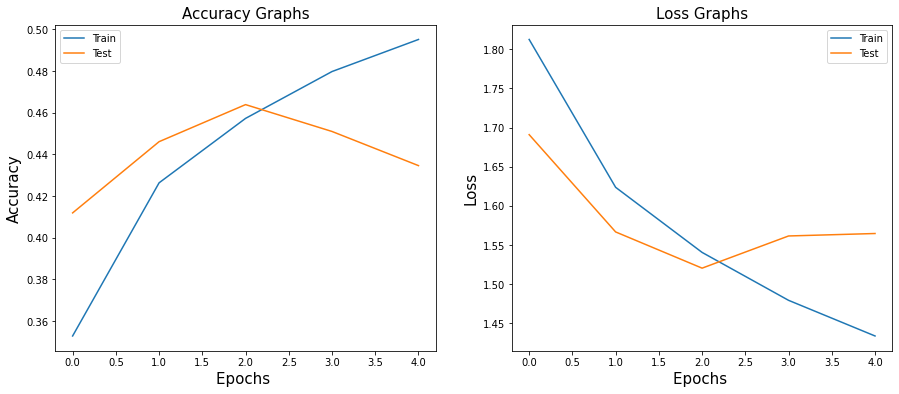

In [31]:
history_graph(ann_history)

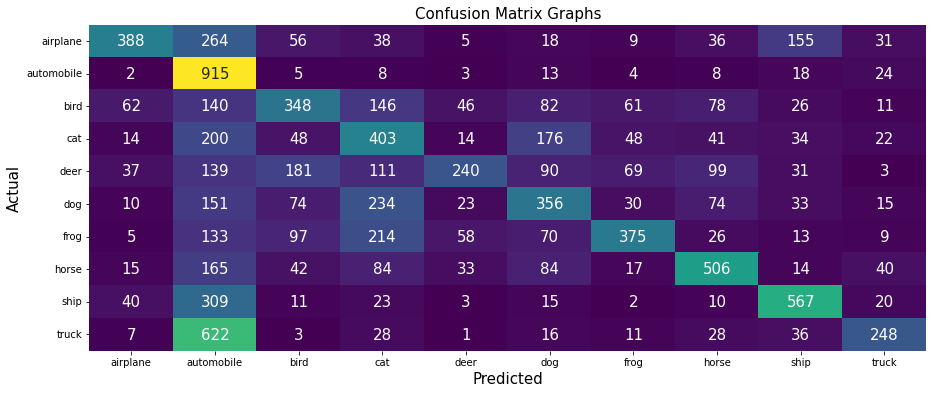

In [32]:
confusion_graph(y_test,y_pred_ann_classes, classes=classes)

In [33]:
# Cnn Modeli Kuralım

cnn = Sequential()

cnn.add(Conv2D(filters = 32 , kernel_size = (3,3), strides=(1,1), activation = "relu", input_shape = (32,32,3)))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Conv2D(filters = 64, kernel_size = (3,3), strides = (1,1), activation= "relu"))
cnn.add(MaxPooling2D(pool_size=(2,2)))

cnn.add(Flatten())
cnn.add(Dense(64, activation ="relu"))
cnn.add(Dense(10, activation = "softmax"))

cnn.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

cnn_history = cnn.fit(X_train, y_train, epochs = 5, validation_data = (X_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 62s 40ms/step - loss: 1.4496 - accuracy: 0.4756 - val_loss: 1.1799 - val_accuracy: 0.5887
Epoch 2/5
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0995 - accuracy: 0.6152 - val_loss: 1.0410 - val_accuracy: 0.6407
Epoch 3/5
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9751 - accuracy: 0.6613 - val_loss: 1.0004 - val_accuracy: 0.6532
Epoch 4/5
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8962 - accuracy: 0.6880 - val_loss: 0.9551 - val_accuracy: 0.6680
Epoch 5/5
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8319 - accuracy: 0.7109 - val_loss: 0.9065 - val_accuracy: 0.6912


In [34]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                147520    
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

In [35]:
# Yükseldi
# 6797
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9065 - accuracy: 0.6912


[0.9064639806747437, 0.6912000179290771]

In [36]:
# Farka Bak !!

ann.evaluate(X_test,y_test)

313/313 [==============================] - 7s 24ms/step - loss: 1.5648 - accuracy: 0.4346


[1.5647872686386108, 0.43459999561309814]

In [37]:
y_pred_cnn = cnn.predict(X_test)
y_pred_cnn[:5]

array([[1.5140428e-02, 7.6561753e-04, 1.9176006e-02, 4.8815638e-01,
        1.5886212e-03, 3.5772410e-01, 3.4045096e-02, 1.3230615e-03,
        7.8246221e-02, 3.8344930e-03],
       [1.7992014e-02, 4.7881547e-02, 4.4757840e-06, 2.7954318e-05,
        7.0969345e-06, 3.1942782e-06, 2.2568888e-06, 4.6762889e-06,
        9.2909807e-01, 4.9787550e-03],
       [1.2212847e-01, 2.6590675e-01, 7.5406763e-03, 1.7097432e-02,
        4.5574065e-03, 4.3269023e-03, 6.6890046e-03, 1.9153142e-02,
        4.7305411e-01, 7.9546034e-02],
       [8.2358909e-01, 2.5018392e-02, 2.3432782e-02, 3.8393593e-04,
        1.3536563e-02, 2.5338839e-05, 2.8583631e-03, 2.1058941e-04,
        1.1088306e-01, 6.1763138e-05],
       [3.3368149e-05, 1.6793399e-05, 2.5599113e-02, 2.8031100e-02,
        6.9381046e-01, 3.8416341e-03, 2.4843192e-01, 6.4130145e-05,
        1.6696395e-04, 4.4522358e-06]], dtype=float32)

In [38]:
y_pred_cnn_classes = [np.argmax(i) for i in y_pred_cnn]
y_pred_cnn_classes[:10]

[3, 8, 8, 0, 4, 6, 1, 4, 3, 1]

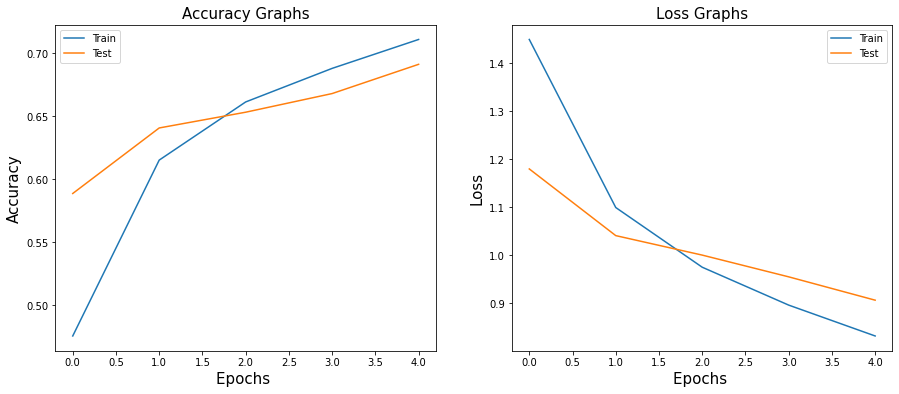

In [39]:
history_graph(cnn_history)

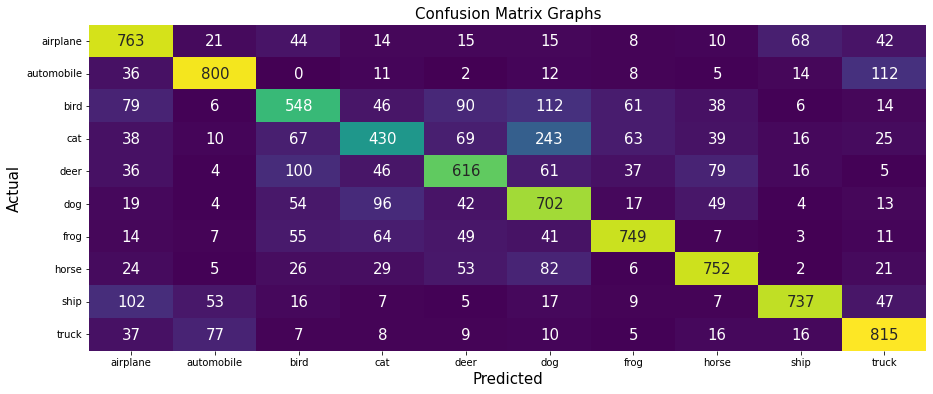

In [40]:
confusion_graph(y_test, y_pred_cnn_classes, classes = classes)